#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7E4456>Widhya</font></center>

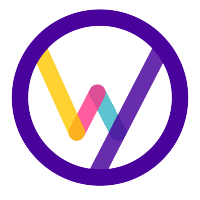

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=7E4456>Data Science Internship

### <center><font color=7E4456>By </font><font color=15D77D>: </font><font color=5B1736>Shreeya Ravindra Pant-Paradkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center><font color=5B4727>Prediction using Supervised ML</font></center>
### <center><font color=5B4727>(Level - Beginner)</font></center>
# <center><font color=14655D>Mission 2 : Stock Price Prediction Using Linear Regression</font></center>
### <center><font color=155E64>Problem Statement: </font><font color=5B4727>Predict the future stock prices using linear regression</font>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Date: 13-01-21 (Wednesday)

#### Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Reading Data

In [2]:
df = quandl.get("WIKI/AAPL")

#### Data Exploration

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [4]:
df.shape

(9400, 12)

#### Calculating new fields High-Low Percentage (HL_PCT) and Percentage Change (PCT_Cchange)

In [5]:
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100.0

In [6]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0,0.417391,0.000000
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0,0.477064,-0.474799
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0,0.475248,-0.473000
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0,0.502513,0.000000
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0,0.450620,0.000000


#### Subsetting required features

In [7]:
df = df[['Adj. Close','PCT_change','HL_PCT']]

In [8]:
df.head()

,Adj. Close,PCT_change,HL_PCT
Date,,,
1980-12-12,0.422706,0.000000,0.417391
1980-12-15,0.400652,-0.474799,0.477064
1980-12-16,0.371246,-0.473000,0.475248
1980-12-17,0.380362,0.000000,0.502513
1980-12-18,0.391536,0.000000,0.450620


#### Identifying Null values

In [9]:
df.isna().sum()

Adj. Close    0
PCT_change    0
HL_PCT        0
dtype: int64

#### A variable for predicting no. of days out into the future

In [10]:
forecast_out = 10 #'n=10' days

#### Creating another column (i.e. target variable) shifted 'n' units up

In [11]:
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

In [12]:
df.head()

,Adj. Close,PCT_change,HL_PCT,Prediction
Date,,,,
1980-12-12,0.422706,0.000000,0.417391,0.529301
1980-12-15,0.400652,-0.474799,0.477064,0.516363
1980-12-16,0.371246,-0.473000,0.475248,0.501807
1980-12-17,0.380362,0.000000,0.502513,0.507247
1980-12-18,0.391536,0.000000,0.450620,0.496220


In [13]:
df.tail()

,Adj. Close,PCT_change,HL_PCT,Prediction
Date,,,,
2018-03-21,171.270,-2.153793,2.236235,NaN
2018-03-22,168.845,-0.679412,2.416417,NaN
2018-03-23,164.940,-2.048815,3.019280,NaN
2018-03-26,172.770,2.796454,3.854836,NaN
2018-03-27,168.340,-3.074620,4.888915,NaN


#### Creating independent data set (X)
#### Converting the dataframe to a numpy array

In [14]:
X = np.array(df.drop(['Prediction'],1))

#### Removing the last '10' rows

In [15]:
X = X[:-forecast_out]
print(X)

[[  0.42270592   0.           0.4173913 ]
 [  0.40065169  -0.47479912   0.47706422]
 [  0.37124607  -0.47299961   0.47524752]
 ...
 [179.98         1.13508654   1.45016113]
 [181.72         0.79316656   1.19964781]
 [179.97        -1.43490881   2.36706118]]


#### Creating the dependent data set (y)
#### Convert the dataframe to a numpy array

In [16]:
y = np.array(df['Prediction'])

#### Geting all of the y values except the last '10' rows

In [17]:
y = y[:-forecast_out]
print(y)

[  0.52930132   0.51636284   0.50180706 ... 164.94       172.77
 168.34      ]


#### Split the dataset into 80% training and 20% testing

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Model Building: Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Testing: Score returns the coefficient of determination R^2 of the prediction

In [20]:
print('Training Score: ', round(lr.score(x_train,y_train)*100,2),'%')

# The best possible score is 1.0
print('lr confidence (Testing Score): ', round(lr.score(x_test,y_test)*100,2))

Training Score:  99.72 %
lr confidence (Testing Score):  99.67


#### Model Prediction

In [21]:
y_pred = lr.predict(x_test)
print(y_pred)

[ 2.59032683  1.34504619 55.60884315 ...  1.51110867 29.06700642
 75.77508749]


#### Model performance

In [22]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_pred)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

Accuracy Score of Model:  99.67 %


#### Actual Price v/s Predicted Price

In [23]:
prediction_df = pd.DataFrame({ 'Actual Price': y_test, 'Predicted Price': y_pred})  
prediction_df.head()

,Actual Price,Predicted Price
0,2.074215,2.590327
1,1.393091,1.345046
2,50.928800,55.608843
3,1.096224,1.273868
4,12.148423,11.876531


#### Model Evaluation

In [24]:
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test,y_pred),2))
print('Mean Squared Error:',round(metrics.mean_squared_error(y_test,y_pred),2))
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))
print('Explained Variance Score:',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error: 0.92
Mean Squared Error: 4.63
Root Mean Squared Error: 2.15
Explained Variance Score: 0.9967292918122171


#### Forecasting

In [25]:
#set x_forecast equal to the last 10 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[ 1.78440000e+02 -1.04259095e+00  1.51871778e+00]
 [ 1.78650000e+02  8.40336134e-02  1.21460957e+00]
 [ 1.78020000e+02 -3.52644836e-01  8.42601955e-01]
 [ 1.75300000e+02 -1.13918340e+00  2.17341700e+00]
 [ 1.75240000e+02  0.00000000e+00  1.06140151e+00]
 [ 1.71270000e+02 -2.15379342e+00  2.23623518e+00]
 [ 1.68845000e+02 -6.79411765e-01  2.41641742e+00]
 [ 1.64940000e+02 -2.04881525e+00  3.01927974e+00]
 [ 1.72770000e+02  2.79645386e+00  3.85483591e+00]
 [ 1.68340000e+02 -3.07461999e+00  4.88891529e+00]]


In [26]:
#printing lR model predictions for the next '10' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[179.56912809 179.7803362  179.15546402 176.3997757  176.35381339
 172.3503082  169.90097794 165.96928758 173.8061062  169.36041872]


#### Creating Final function for price prediction

In [27]:
def pricepredictor(forecast_days):
    
    
    # A variable for predicting 'n' days out into the future
    forecast_out = forecast_days
    df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
    
    # Convert the dataframe to a numpy array
    X = np.array(df.drop(['Prediction'],1))
    
    #Remove the last '10' rows
    X = X[:-forecast_out]
    
    # Convert the dataframe to a numpy array 
    y = np.array(df['Prediction'])
    
    # Get all of the y values except the last '10' rows
    y = y[:-forecast_out]

    # Split the data into 80% training and 20% testing
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create and train the Linear Regression  Model
    lr = LinearRegression()
    
    # Train the model
    lr.fit(x_train, y_train)

    # The best possible score is 1.0
    lr_confidence = lr.score(x_test, y_test)
    print('The Confidence {}\n'.format(lr_confidence))
    
    # Set x_forecast equal to the last 10 rows of the original data set from Adj. Close column
    x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]

    
    # Print linear regression model predictions for the next '10' days
    lr_prediction = lr.predict(x_forecast)
    print('Prediction for next {} day price:\n {}'.format(forecast_days,lr_prediction))

#### Predictiing next 1 day price

In [28]:
pricepredictor(1)

The Confidence 0.9996976245891099

Prediction for next 1 day price:
 [168.42003792]


#### Predicting next 15 days price

In [29]:
pricepredictor(15)

The Confidence 0.9962676891587227

Prediction for next 15 day price:
 [176.80571064 178.7258514  181.78624378 183.54959692 181.75520576
 180.23277953 180.45134419 179.82582406 177.04619363 177.01355184
 172.97807238 170.52371713 166.56795481 174.44306807 169.95173164]


#### Conclusion
##### I have successfully predicted the future stock prices using Supervised ML Algorithm and was able to evaluate the model's performance based on various parameters. Model has got 99.72 % accuracy, which means model has been trained very well, i.e, it is a good fit model.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=5B1736>Thank You!</font></center>